# [Week2] 머신러닝 기초

## 1. 머신러닝 기본 용어 정리 [[ 강의 링크 ](https://edu.goorm.io/learn/lecture/4012/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%8A%B5)]

### 1 ). Overfitting & underfitting

1. 오버피팅 (overfitting) 이란?<br/>
\[답변]  more variance 그리고 less bias 하여 보다 train data 에 대해서는 특징들을 잘 인식하지만 test data에 대해서는 예측이 잘 안되는 것

2. 언더피팅 (underfitting) 이란? <br/>
\[답변] machine이 too bias 하게 되어 그 특징들이 너무 포괄적이라 제대로 사물들이 인식되지 못할 때

3. underfitting 을 막는 방법 2가지 <br/>
\[답변] 1. 더 많은 feature을 찾아준다 <br/>
 &nbsp; &nbsp;  &nbsp;  &nbsp;  &nbsp; &nbsp;2. high variance 모델인 Decision Tree, K-nn, SVM 모델을 사용한다

4. overfitting을 판단하는 방법 <br/>
\[답변] train data에 대해서는 잘 예측되지만 test data에 대해서는 잘 예측되지 않을때

5. overfitting을 막는 방법<br/>
\[답변] 1. cross - validation을 하여 일부를 test data로 사용할 수 있도록 하는 것 <br/>
 &nbsp; &nbsp;  &nbsp;  &nbsp;  &nbsp; &nbsp;2. 정규화를 하는 방법

### 2 ). Norm ( 정규화 )
= 벡터의 전체 크기
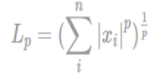

1. Norm 수식<br/>
\[답변] np.linalg.norm( X, ord = None, axis = None, keepdims = False )

2. L1 Norm 수식 <br/>
\[답변] 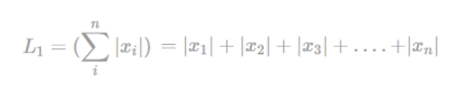
 = Manhattan Distance ( 벡터의 절댓값 ) <br/>
np.linalg.norm( X, ord = 1, axis = 1 )

In [8]:
import pandas as pd
import numpy as np
from numpy import linalg

df = pd.DataFrame(np.random.randint(low=-3, high=3, size = (3,3)))
df.columns = ['move_1','move_2','move_3']
df.head()

,move_1,move_2,move_3
0,-2,-2,0
1,-3,-3,-1
2,-3,1,1


In [11]:
# Who moved the most?
movements = df.values
movements
linalg.norm(movements, ord=1, axis=1)
# 0 : |-2| + |-2| = 4
# 1 : |-3| + |-3| + |-1| = 7
# 2 : |-3| + |1| + |1| = 5

array([4., 7., 5.])

3. L2 Norm 수식 <br/>
\[답변] 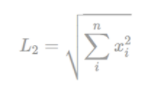
= Euclidean Distance ( 벡터의 제곱값의 평균 )<br/>
np.linalg.norm( X, ord = 2, axis = 1)

In [14]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns = ('x','y')
df.head()

,x,y
0,4,1
1,1,2
2,5,4


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(6.799999999999997, 0.5, 'Y')

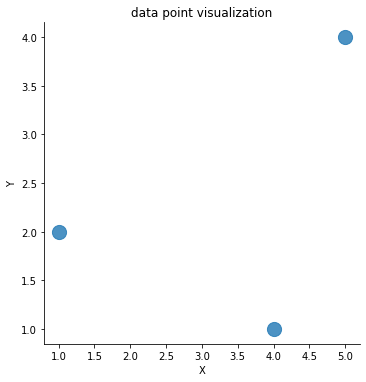

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('x','y',data=df, fit_reg=False,scatter_kws={'s':200})
plt.title('data point visualization')
plt.xlabel('X')
plt.ylabel('Y')
# 어떤 점이 (0,0) 에서 제일 가까울지

In [17]:
data_points = df.values
data_points

array([[4, 1],
       [1, 2],
       [5, 4]])

In [19]:
linalg.norm(data_points, ord=2, axis=1)

array([4.12310563, 2.23606798, 6.40312424])

4. L2 Norm이 사용되는 Machine Learning 알고리즘<br/>
\[답변] KNN 알고리즘, Kmeans 알고리즘

In [4]:
import numpy as np
from numpy import linalg as LA
a = np.arange(9) -4
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [6]:
b = a.reshape((3,3))
b

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [7]:
LA.norm(a)

7.745966692414834

### PCA 차원 축소

In [45]:
# ex)
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])
df.loc[0] = [1200,1,0,0,2,'Skinny']
df.loc[1] = [2800,1,1,1,1,'Normal']
df.loc[2] = [3500,2,2,1,0,'Fat']
df.loc[3] = [1400,0,1,0,3,'Skinny']
df.loc[4] = [5000,2,2,2,0,'Fat']
df.loc[5] = [1300,0,0,1,2,'Skinny']
df.loc[6] = [3000,1,0,1,1,'Normal']
df.loc[7] = [4000,2,2,2,0,'Fat']
df.loc[8] = [2600,0,2,0,0,'Normal']
df.loc[9] = [3000,1,2,1,1,'Fat']
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [46]:
X = df.drop(['body_shape'],axis=1)
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [47]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [48]:
# rescaling feature vectors to all have the same scale
# ex). 1200 이면 이를 1에서 3사이로 범위를 rescale 하는 과정을 의미한다
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std
# 모두 같은 범위 내에 있도록 해줌

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [49]:
# Covariance Matrix of features
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [50]:
# 아직까지 5차원이니까
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigencevectors \n',eig_vecs)

Eigencevectors 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [51]:
print('Eigencevalues \n',eig_vals)

Eigencevalues 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [52]:
eig_vals[0]/sum(eig_vals)
# 이게 무슨 뜻이냐면 1차원으로 축소했을때 가량 73%의 정보를 함축할 수 있다는 뜻이다

0.7318321731427545

In [53]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [59]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis']=0.0
result['labels'] = Y
result

,PC1,y-axis,labels
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

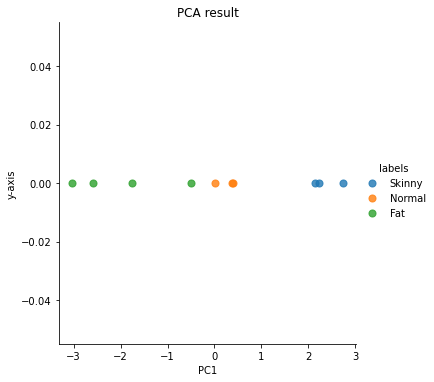

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot('PC1','y-axis',data = result, fit_reg=False, scatter_kws={'s':50},hue='labels')
plt.title('PCA result')

In [64]:
# 더 빠른 방법
from sklearn import decomposition
pca = decomposition.PCA(n_components=1) # 1차원으로 놓겠다
sklearn_pca_x = pca.fit_transform(x_std)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


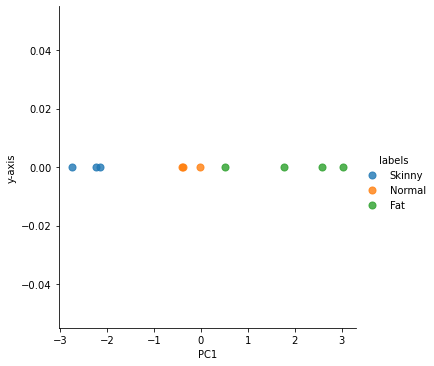

In [65]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['PC1'])
sklearn_result['y-axis']=0.0
sklearn_result['labels']=Y
sns.lmplot('PC1','y-axis',data=sklearn_result, fit_reg=False,scatter_kws={'s':50},hue='labels')

### Confusion Matrix (혼동 행렬)  
![image](https://user-images.githubusercontent.com/45345120/94503235-f23a4680-0240-11eb-9fae-86768d58ff58.png)

In [ ]:
import seaborn as sns